## **Index**
-     <a href='#1'>1 Introduction</a>
    - <a href='#1.1'>      1.1 Problem Statement</a>
    - <a href='#1.2'>      1.2 Data </a>
-     <a href='#2'>2 Methodology</a>
    - <a href='#2.1'>  2.1 Exploratory Data Analysis </a>
        - <a href='#2.1.1'>          2.1.1 Descriptive Analysis </a>
           - <a href='#2.1.1.1'>            2.1.1.1 Features Analysis </a>
           - <a href='#2.1.1.2'>            2.1.1.2 Missing Value Analysis </a>
           - <a href='#2.1.1.3'>            2.1.1.3 Target Variable Analysis </a>
        - <a href='#2.1.2'>          2.1.2 Visualization </a>
           - <a href='#2.1.2.1'>            2.1.2.1 Attributes Distributions and trends </a>
           - <a href='#2.1.2.2'>            2.1.2.2 Outlier Analysis </a>
    - <a href='#2.2'>      2.2 Data Preprocessing and Analysis </a>
        - <a href='#2.2.1'>          2.2.1 Outlier Handling </a>
        - <a href='#2.2.2'>          2.2.2 Feature Selection </a>
        - <a href='#2.2.3'>          2.2.3 Feature Engineering </a>
    - <a href='#2.3'>      2.3 Modeling </a>
        - <a href='#2.3.1'>          2.3.1 Random Sampling</a>
        - <a href='#2.3.2'>          2.3.2 Multilinear & Regularization Regression </a>
        - <a href='#2.3.3'>          2.3.3 Random Forest </a>
        - <a href='#2.3.4'>          2.3.4 Gradient Boosting </a>
- <a href='#3'>3 Final Model</a>

# <a id='1'>1. Introduction</a>

The usage of bicycles as a mode of transportation has gained traction in recent years due to with environmental and health issues. The cities across the world have successfully rolled out bike sharing programs to encourage usage of bikes. Under such programs, the riders can rent bicycles using manual or automated stalls spread across the city for defined periods. In most cases, riders can pick up bikes from one location and returned them any other designated place. 
 
The bike sharing programs from across the world are hotspots of all sorts of data, ranging from travel time, start and end location, demographics of riders, and so on. This data along with alternate sources of information such as weather, traffic, terrain, season and so on. 


## <a id='1.1'>1.1 Problem Statement</a>

The objective of this Case is to Predication of bike rental count on daily based on the environmental and seasonal settings. The objective is to forecast bike rental demand of Bike sharing program in Washington, D.C based on historical usage patterns in relation with weather, environment and other data. We would be interested in predicting the rentals on various factors including season, temperature, weather and building a model that can successfully predict the number of rentals on relevant factors.

## <a id='1.2'>1.2 Data</a>

This dataset contains the seasonal and weekly count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding temperature and humidity information. Bike sharing systems are a new way of traditional bike rentals. The wohle process from memberhsip to rental and retrun back has become automatic. The data was generated by 500 bike-sharing programs and was collected by the Laboratory of Artiﬁcial Intelligence and Decision Support (LIAAD), University of Porto. Given below is the description of the data which is a (731, 16) shaped data.

### short description of features
1.  instant: Record index
1.  dteday: Date
1.  season: Season (1:spring, 2:summer, 3:fall, 4:winter)
1.  yr: Year (0: 2011, 1:2012)
1.  mnth: Month (1 to 12)
1.  holiday: weather day is holiday or not (extracted from Holiday Schedule)
1.  weekday: Day of the week
1.  workingday: If day is neither weekend nor holiday it's 1, otherwise is 0.
1.  weathersit: (extracted from Freemeteo)
>1.  Clear, Few clouds, Partly cloudy, Partly cloudy
>2.  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
>3.  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
>4.  Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
1.  temp: Normalized temperature in Celsius. 
1.  atemp: Normalized feeling temperature in Celsius. 
1.  hum: Normalized humidity. The values are divided to 100 (max)
1.  windspeed: Normalized wind speed. The values are divided to 67 (max)
1.  casual: count of casual users
1.  registered: count of registered users
1.  cnt: count of total rental bikes including both casual and registered

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import os, sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
import random 
import pandas_profiling as pp

# configure font_scale and linewidth for seaborn
sns.set_context('paper', font_scale=1.3, rc={"lines.linewidth": 2})

# preprocessing and metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_squared_log_error, make_scorer

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# regresson model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# pipeline builder
from sklearn.pipeline import Pipeline, make_pipeline


In [2]:
# list files in dir
print(os.listdir('../input/bike-sharing-dataset/'))

['Readme.txt', 'day.csv', 'hour.csv']


In [3]:
# load data
bike_day = pd.read_csv('../input/bike-sharing-dataset/day.csv')
print('Shape of the data:', bike_day.shape) # shape of data
bike_day.head() # top 5 rows of data

Shape of the data: (731, 16)


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
# data informations
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# renaming the columns
bike_day.rename(columns={'dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition','hum':'humidity','cnt':'total_count'},inplace=True)

#Type casting the datetime and numerical attributes to category
bike_day['datetime']=pd.to_datetime(bike_day.datetime) # datetime conversion
bike_day['season']=bike_day.season.astype('category') # categorical conversion
bike_day['year']=bike_day.year.astype('category')
bike_day['month']=bike_day.month.astype('category')
bike_day['holiday']=bike_day.holiday.astype('category')
bike_day['weekday']=bike_day.weekday.astype('category')
bike_day['workingday']=bike_day.workingday.astype('category')
bike_day['weather_condition']=bike_day.weather_condition.astype('category')

bike_day.info() # data information after typecasting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant              731 non-null int64
datetime             731 non-null datetime64[ns]
season               731 non-null category
year                 731 non-null category
month                731 non-null category
holiday              731 non-null category
weekday              731 non-null category
workingday           731 non-null category
weather_condition    731 non-null category
temp                 731 non-null float64
atemp                731 non-null float64
humidity             731 non-null float64
windspeed            731 non-null float64
casual               731 non-null int64
registered           731 non-null int64
total_count          731 non-null int64
dtypes: category(7), datetime64[ns](1), float64(4), int64(4)
memory usage: 57.9 KB


# <a id='2'>2. Methodology</a>

# <a id='2.1'>2.1 Exploratory Data Analysis</a>
In this section, we'll explore the attributes and data values. Familiarity with data will provide more insight knowledge for data pre-processing, analysize how to use graphical and numerical techniques to begin uncovering the structure of our data.

By looking at data I came across that data is without any missing values however, casual user variable has outliers in it. Visualizations of the bike rental count base on the season, month, day of the week, the type of day, is it a weekday, is it a holiday, and the type of weather, then calculating the mean of temperature, humidity, wind speed and rental count. The purpose of this summarization is to ﬁnd a general relationship between variables regardless of which year the data is from.

### <a id='2.1.1'>2.1.1 Descriptive Analysis</a>

### <a id='2.1.1.1'>2.1.1.1 Feature Analysis</a>

#### Generating profile report using pandas_profiling
For each column the following statistics are presented in an interactive HTML page:
* Essentials: type, unique values, missing values
* Quantile statistics : minimum value, Q1, median, Q3, maximum, range, interquartile range
* Descriptive statistics : mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
* Most frequent values
* Histogram
* Correlations highlighting of highly correlated variables, Spearman and Pearson matrixes

In [6]:
# profile report generated in the saved repository as a html file
profile = pp.ProfileReport(bike_day)
profile.to_file("profile.html") # saving profile report as html doc
profile

Click profile to open profile report in new tab.
<button><a href='./profile.html' ><b>profile</b></a></button>

In [7]:
#diffrent value counts in each categorical features
categorical_col = ['season', 'year', 'month', 'holiday', 'weekday','workingday', 'weather_condition']
end='\n'+'*'*10+'\n' # end line seperator

for col in categorical_col:
    print(col,':\n',bike_day[col].value_counts(),end=end) # listing frequency of each value for all of the categorical features

season :
 3    188
2    184
1    181
4    178
Name: season, dtype: int64
**********
year :
 1    366
0    365
Name: year, dtype: int64
**********
month :
 12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: month, dtype: int64
**********
holiday :
 0    710
1     21
Name: holiday, dtype: int64
**********
weekday :
 6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
**********
workingday :
 1    500
0    231
Name: workingday, dtype: int64
**********
weather_condition :
 1    463
2    247
3     21
Name: weather_condition, dtype: int64
**********


### <a id='2.1.1.2'>2.1.1.2 Missing Value Analysis</a>

In [8]:
# missing value checking
print('Number of missing values:\n',bike_day.isnull().sum())

#  description 
bike_day.describe()

Number of missing values:
 instant              0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64


instant        temp       atemp    humidity   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    0.495385    0.474354    0.627894    0.190486   
std    211.165812    0.183051    0.162961    0.142429    0.077498   
min      1.000000    0.059130    0.079070    0.000000    0.022392   
25%    183.500000    0.337083    0.337842    0.520000    0.134950   
50%    366.000000    0.498333    0.486733    0.626667    0.180975   
75%    548.500000    0.655417    0.608602    0.730209    0.233214   
max    731.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered  total_count  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

### <a id='2.1.1.3'>2.1.1.3 Sneakpeak for target variable</a>

Target variable (total_count) distribution
> target variable is normally distributed, no skewness observed.

Text(0.5, 1.0, 'KDE plot')

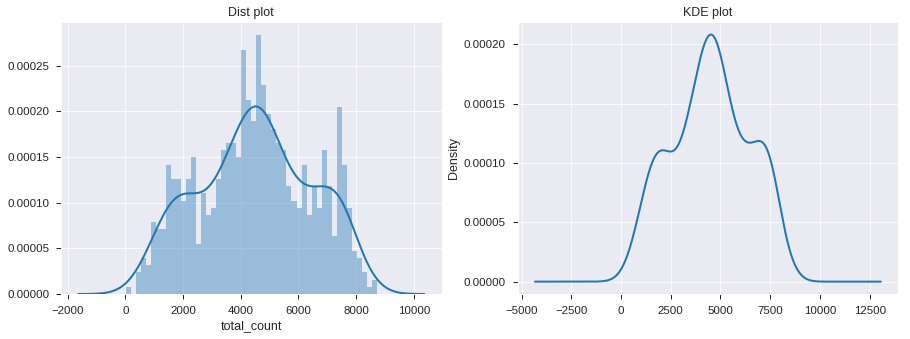

In [9]:
# Distribution of target variable
_ , ax = plt.subplots(1,2, figsize=(15,5)) # 1 row 2 column subplot 

sns.distplot(bike_day.total_count, bins=50, ax=ax[0]) # dependent variable distribution plot with 50 bins
ax[0].set_title('Dist plot')

ax[1] = bike_day.total_count.plot(kind='kde') # dependent variable KDE plot 
ax[1].set_title('KDE plot')


### <a id='2.1.2'>2.1.2 Visualization</a>

It is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. With a little domain knowledge, data visualizations can be used to express and demonstrate key relationships in plots and charts that are more visceral to yourself and stakeholders than measures of association or significance. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results.
One of our main goals for visualizing the data here, is to observe which features are most intiuitive in predicting target. The other, is to draw general trend, may aid us in model selection and hyper parameter selection.


### <a id='2.1.2.1'>2.1.2.1 Attribute Distribution and Trends </a>

####  Categorical features



In [10]:
categorical_features = categorical_col
print('Categorical features :',', '.join(categorical_features))

Categorical features : season, year, month, holiday, weekday, workingday, weather_condition


In [11]:
# Holiday wise yearly count of bike rental
bike_day[['season','year', 'total_count', 'holiday']].groupby([ 'year', 'holiday']).sum()

total_count
year holiday             
0    0            1213081
     1              30022
1    0            2001163
     1              48413

In [12]:
# weather condition wise  count of bike rental
bike_day[['weather_condition', 'total_count']].groupby(['weather_condition']).sum()

total_count
weather_condition             
1                      2257952
2                       996858
3                        37869

In [13]:
# weather condition wise  avg_count of bike rental
bike_day[['weather_condition', 'total_count']].groupby(['weather_condition']).mean().round().astype(int)

total_count
weather_condition             
1                         4877
2                         4036
3                         1803

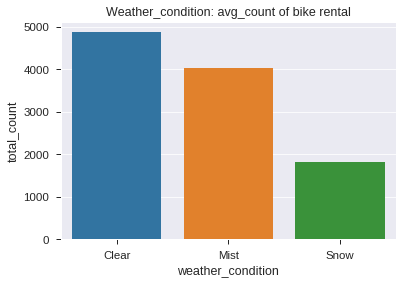

In [14]:
# weather condition wise  avg_count of bike rental
ax = sns.barplot(x='weather_condition',y='total_count',data=bike_day, ci=None)
ax.set_title("Weather_condition: avg_count of bike rental") # set title
ax.set_xticklabels(['Clear', 'Mist', 'Snow']) # set x-tick labels
plt.show()

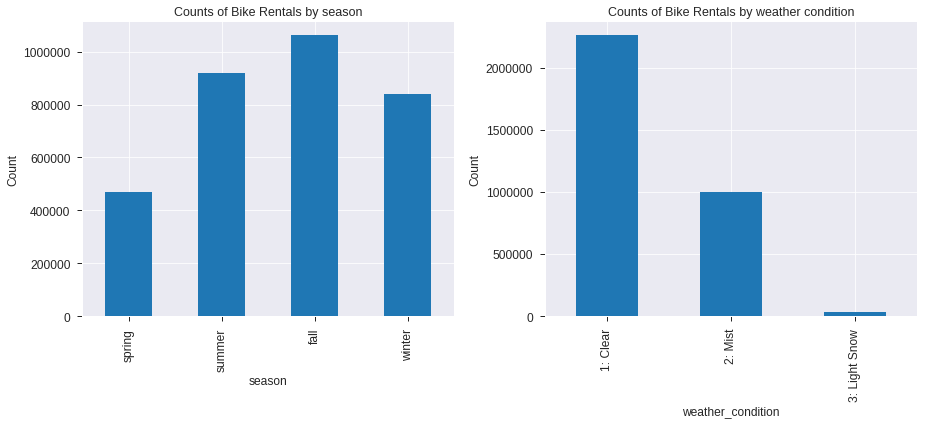

In [15]:
f, (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6)) # 1 row 2 column subplot 

# Counts of Bike Rentals by season
ax1 = bike_day[['season','total_count']].groupby(['season']).sum().reset_index().plot(kind='bar',legend = False, title ="Counts of Bike Rentals by season", stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)  # set x-axis labels
ax1.set_ylabel("Count", fontsize=12)  # set y-axis labels
ax1.set_xticklabels(['spring','summer','fall','winter'])  # set x-tick labels

# Counts of Bike Rentals by weather condition 
ax2 = bike_day[['weather_condition','total_count']].groupby(['weather_condition']).sum().reset_index().plot(kind='bar', legend = False, stacked=True, title ="Counts of Bike Rentals by weather condition", fontsize=12, ax=ax2)
ax2.set_xlabel("weather_condition", fontsize=12)  # set x-axis labels
ax2.set_ylabel("Count", fontsize=12)  # set y-axis labels
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow'])  # set x-tick labels

f.tight_layout()

Text(0.5, 1.0, 'Count of bike on workingdays/holidays for each season')

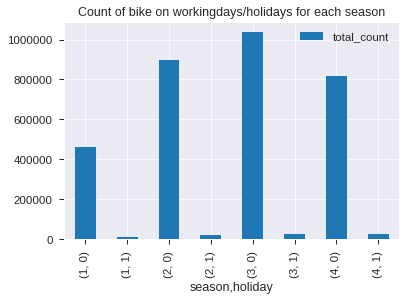

In [16]:
# Count of bike on workingdays/holidays for each season
bike_day[['season','year', 'total_count', 'holiday']].groupby(['season',  'holiday']).sum().plot(kind='bar') # plotting bar graph
plt.title('Count of bike on workingdays/holidays for each season') # set title

[Text(0, 0, '2011'), Text(0, 0, '2012')]

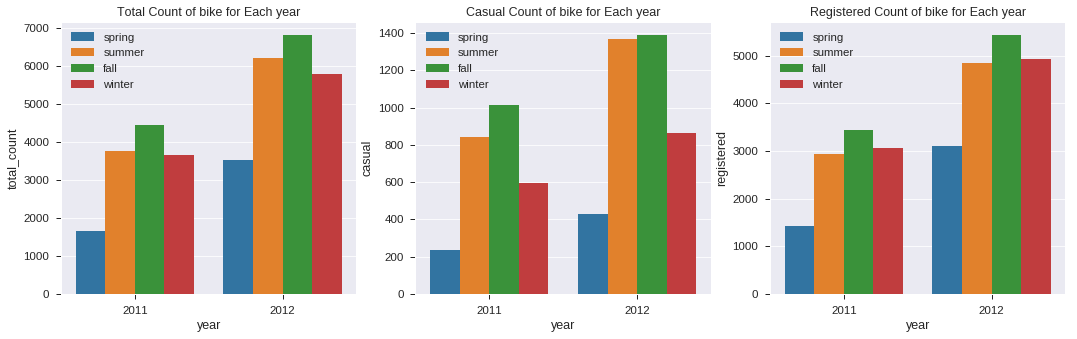

In [17]:
fig, (axs1,axs2,axs3) = plt.subplots(ncols=3, figsize=(18,5))  # 1 row 3 column subplot

# Total Count of bike for Each year
sns.barplot(x='year', y='total_count', data=bike_day, hue='season', ax=axs1, ci=None) # barplot
axs1.set_title('Total Count of bike for Each year') # set tilte
axs1.legend(['spring','summer','fall','winter']) # set legend
axs1.set_xticklabels(['2011', '2012']) # set x-tick label

# Casual Count of bike for Each year
sns.barplot(x='year', y='casual', data=bike_day, hue='season', ax=axs2, ci=None) # barplot
axs2.set_title('Casual Count of bike for Each year') # set title
axs2.legend(['spring','summer','fall','winter']) # set legend
axs2.set_xticklabels(['2011', '2012']) # set x-tick label

# Registered Count of bike for Each year
sns.barplot(x='year', y='registered', data=bike_day, hue='season', ax=axs3, ci=None) # barplot
axs3.set_title('Registered Count of bike for Each year') # set title
axs3.legend(['spring','summer','fall','winter']) # set legend
axs3.set_xticklabels(['2011', '2012']) # set x-tick label



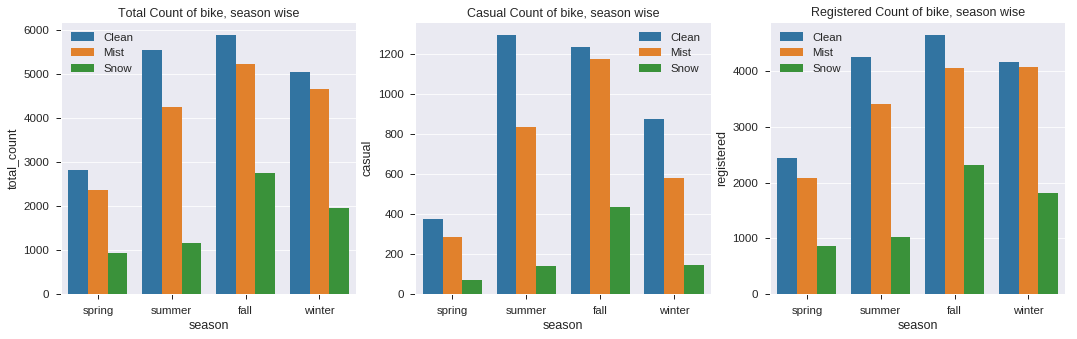

In [18]:
fig, (axs1,axs2,axs3) = plt.subplots(ncols=3, figsize=(18,5)) # 1 row 3 column subplot

# Total Count of bike, season wise
sns.barplot(x='season', y='total_count', data=bike_day, hue='weather_condition', ax=axs1, ci=None) # barplot
axs1.set_title('Total Count of bike, season wise') # set title
axs1.set_xticklabels(['spring','summer','fall','winter']) # set x-tick label
axs1.legend(labels=['Clean', 'Mist', 'Snow']) # set legend

# Casual Count of bike, season wise
sns.barplot(x='season', y='casual', data=bike_day, hue='weather_condition', ax=axs2, ci=None) # barplot
axs2.set_title('Casual Count of bike, season wise') # set title
axs2.set_xticklabels(['spring','summer','fall','winter']) # set x-tick label
axs2.legend(labels=['Clean', 'Mist', 'Snow']) # set legend

# Registered Count of bike, season wise
sns.barplot(x='season', y='registered', data=bike_day, hue='weather_condition', ax=axs3, ci=None) # barplot
axs3.set_title('Registered Count of bike, season wise') # set title
axs3.set_xticklabels(['spring','summer','fall','winter']) # set x-tick label
axs3.legend(labels=['Clean', 'Mist', 'Snow']) # set legend


([<matplotlib.axis.XTick at 0x7efd3c8f9550>,
 <a list of 4 Text xticklabel objects>)

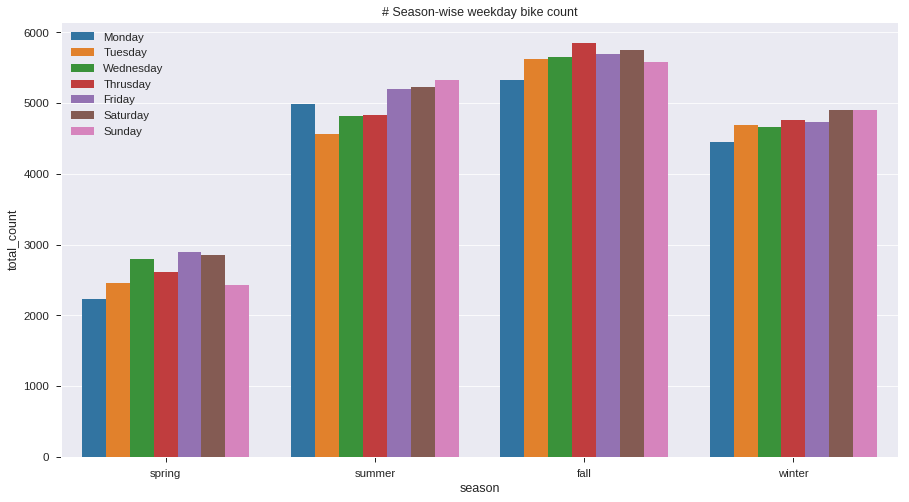

In [19]:
# Season-wise weekday bike count
plt.figure(figsize=(15,8)) # set figure size

sns.barplot(x='season', y='total_count', data=bike_day, hue='weekday', ci=None) # barplot
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Sunday']) # set legend
plt.title('# Season-wise weekday bike count') # set title
plt.xticks(np.arange(4),['spring','summer','fall','winter']) # set x-tick label

([<matplotlib.axis.XTick at 0x7efd5c3e8f60>,
 <a list of 4 Text xticklabel objects>)

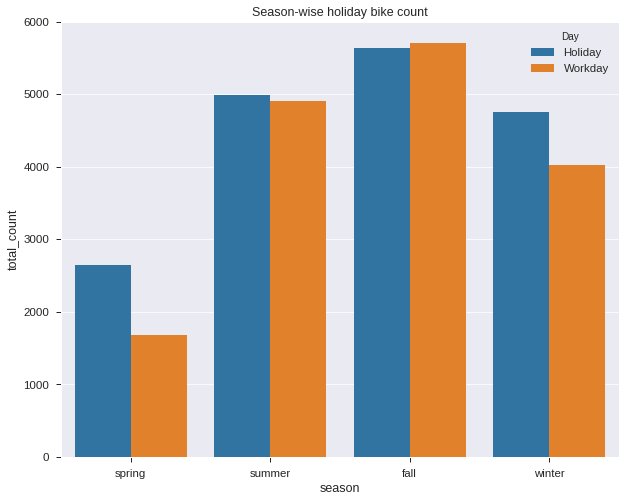

In [20]:
# Season-wise holiday bike count
plt.figure(figsize=(10,8)) # set figure size

sns.barplot(x='season', y='total_count', data=bike_day, hue='holiday', ci=None) # barplot
plt.legend(title='Day',labels= ['Holiday', 'Workday']) # set legend
plt.title('Season-wise holiday bike count') # set title
plt.xticks(np.arange(4),['spring','summer','fall','winter']) # set x-tick label


Text(0.5, 1.0, 'Bike count on weekdays by monthly basis')

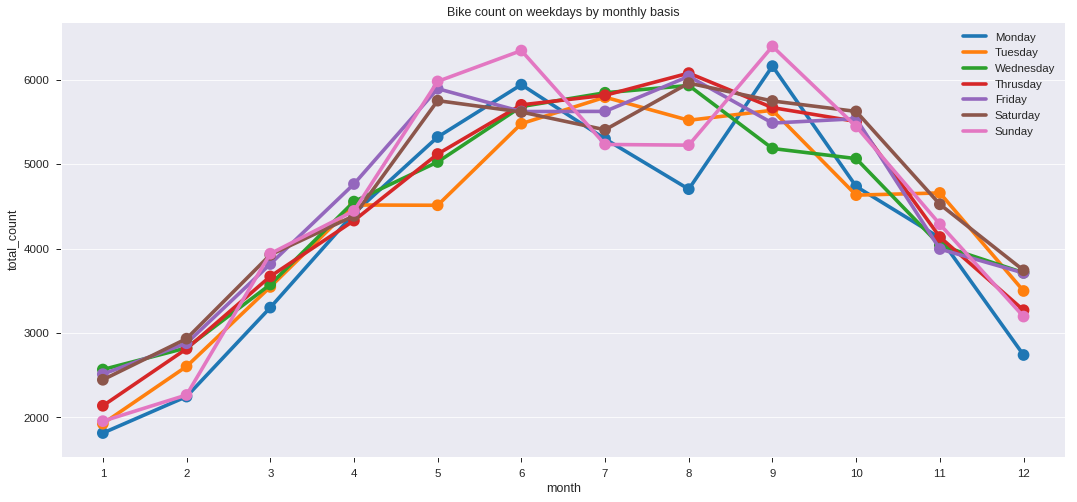

In [21]:
#Consistency of Bike count on weekdays by monthly basis
plt.figure(figsize=(18,8)) # set figure size

sns.pointplot(x='month', y='total_count', data=bike_day, hue='weekday', ci=None) # pointplot
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Sunday']) # set legend
plt.title('Bike count on weekdays by monthly basis') # set title

[Text(0, 0, 'spring'),
 Text(0, 0, 'summer'),
 Text(0, 0, 'fall'),
 Text(0, 0, 'winter')]

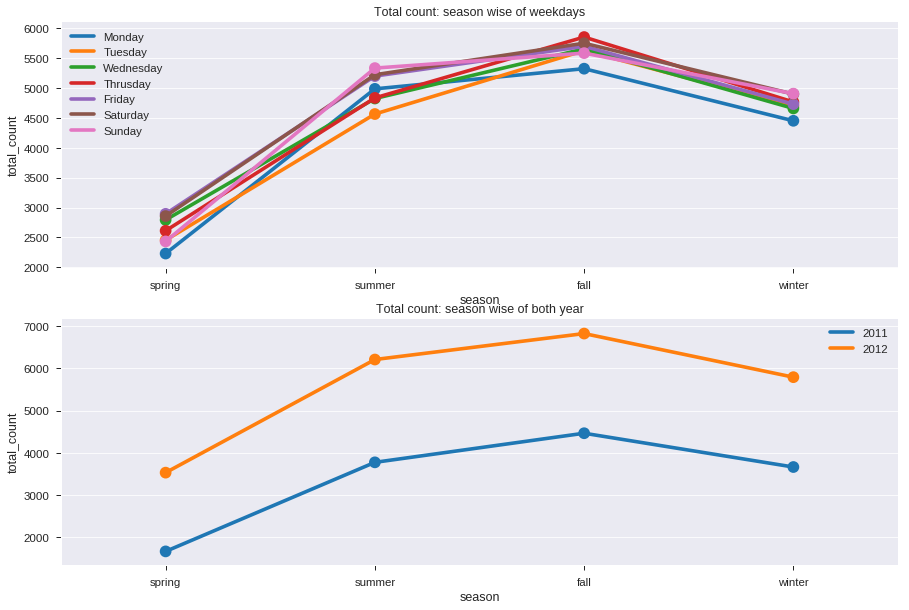

In [22]:
_, ax=plt.subplots(nrows=2, ncols=1, figsize=(15,10))

# Total count: season wise of weekdays
sns.pointplot(x='season', y='total_count', data=bike_day, hue='weekday', ci=None, ax=ax[0]) # pointplot
ax[0].set_title('Total count: season wise of weekdays') # set title
ax[0].legend(['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Sunday']) # set legend
ax[0].set_xticklabels(['spring','summer','fall','winter']) # set x-tick label

# Total count: season wise of both year
sns.pointplot(x='season', y='total_count', data=bike_day, hue='year', ci=None, ax=ax[1]) # pointplot
ax[1].set_title('Total count: season wise of both year') # set title
ax[1].legend(['2011', '2012']) # set legend
ax[1].set_xticklabels(['spring','summer','fall','winter']) # set x-tick label


<b>Extract weekend column as a feature by using datetime feature.

In [23]:
# Generally, 1-Monday and 0-Sunday in datetime , for weekend: Saturday-6 & Sunday-0
# creating new feature 'isweekend' using datetime feature and computing is that date is fall over the weekend
bike_day['isweekend']=bike_day['datetime'].apply( lambda x :1 if (x.weekday()==0) |(x.weekday()==6) else 0 ) # for weekday = 0 or 6, isweekend = 1 else 0 
bike_day[bike_day['isweekend']==1]['weekday'].value_counts() # number of weekend days

1    105
0    105
6      0
5      0
4      0
3      0
2      0
Name: weekday, dtype: int64

In [24]:
# Days wise average causal and registered bike count

casual_avg = bike_day.groupby(['weekday'])['casual'].mean().round().astype(int) # average casual rental on weekday
registered_avg = bike_day.groupby(['weekday'])['registered'].mean().round().astype(int) # average casual rental on weekday

print('Total count: casual {}, registered {}'.format(casual_avg.sum(), registered_avg.sum()))

Total count: casual 5927, registered 25605


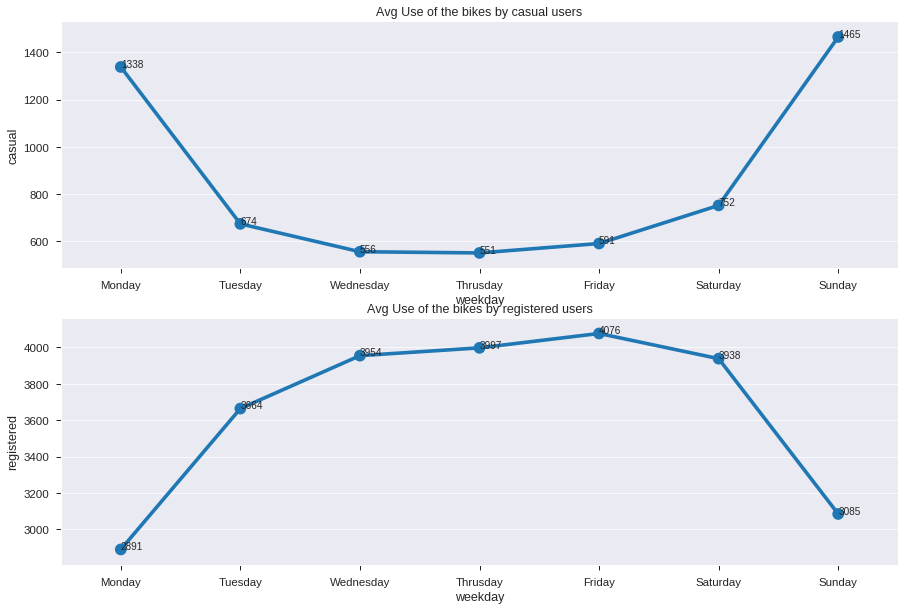

In [25]:
# Avg Use of the bikes by casual users on weekdays
_, ax=plt.subplots(nrows=2, ncols=1, figsize=(15,10)) # 2 row 1 col subplot
sns.pointplot(x='weekday', y='casual', data=bike_day, ci=None, ax=ax[0]) # pointplot
ax[0].set(title="Avg Use of the bikes by casual users") # set title
ax[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Sunday']) # set x-tick label

for c in ax[0].collections:
    for val,of in zip(casual_avg,c.get_offsets()):
        ax[0].annotate(val, of)                         # set annotations for average of each weekday for  casual rentals
        
# Avg Use of the bikes by registered users on weekday
sns.pointplot(x='weekday', y='registered', data=bike_day, ci=None, ax=ax[1]) # set pointplot
ax[1].set(title="Avg Use of the bikes by registered users") # set title
ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Sunday']) # set x-tick label

for c in ax[1].collections:
    for val,of in zip(registered_avg,c.get_offsets()):
        ax[1].annotate(val, of)                          # set annotations for average of each weekday for registered rentals


#### Observation: all Categorical features
- people like to rent bikes more when the sky is clear.
- the count of number of rented bikes is maximum in fall (Autumn) season and least in spring season.
- number of bikes rented per season over the years has increased for both casual and registered users.
- registered users have rented more bikes than casual users overall.
- casual users travel more over weekends as compared to registered users (Saturday / Sunday).
- registered users rent more bikes during working days as expected for commute to work / office.
- demand for bikes are more on working days as compared to holidays ( because majority of the bike users are registered )


####   Continuous features

<b> A. Pairplot

In [26]:
# Columns present in dataset after feature adding
bike_day.columns

Index(['instant', 'datetime', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'total_count', 'isweekend'],
      dtype='object')

Text(0.5, 1.0, 'Continuous variable varition and thier co-relation')

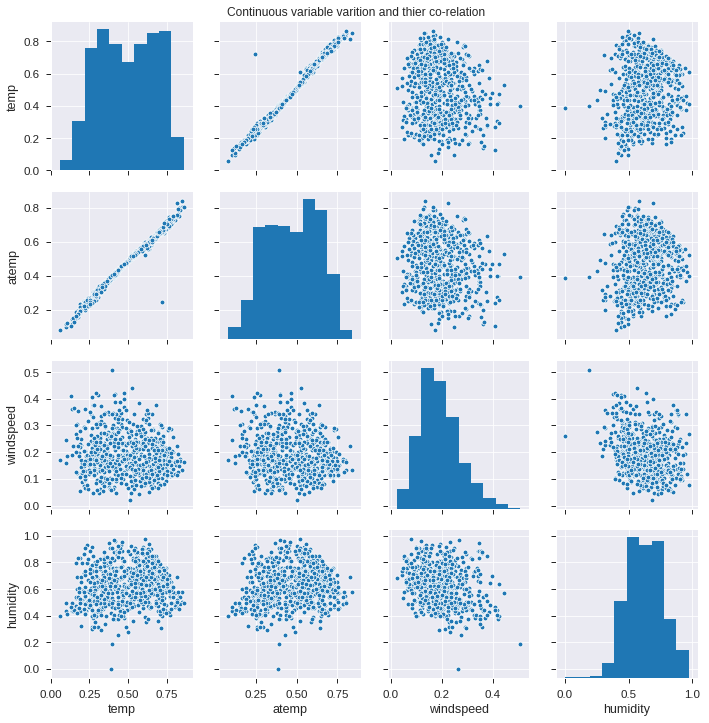

In [27]:
# Visualization of continuous variable varition and thier co-relation
ax = sns.pairplot(bike_day[['temp', 'atemp', 'windspeed', 'humidity']] ) # pairplot
ax.fig.suptitle('Continuous variable varition and thier co-relation',  y=1.0) # set title

<b> B. Regression plot
    
> <b> Regression plot of seaborn used to depict the relationship between continous features and target variable.</b>


Text(0.5, 1.0, '+ve relation between humidity and total_count')

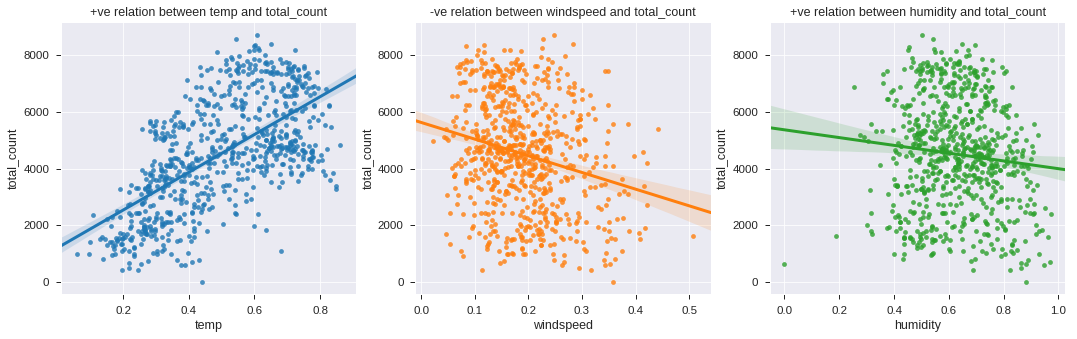

In [28]:
# Regresson plots between temp, windspeed and humidity against total_count
_ , ax = plt.subplots(1,3, figsize=(18,5)) # 1 row 3 column subplot

sns.regplot(x = 'temp', y='total_count', data=bike_day, ax= ax[0]) # Regression plot
ax[0].set_title('+ve relation between temp and total_count') # set title

sns.regplot(x = 'windspeed', y='total_count', data=bike_day, ax= ax[1]) # Regression plot
ax[1].set_title('-ve relation between windspeed and total_count') # set title

sns.regplot(x = 'humidity', y='total_count', data=bike_day, ax= ax[2]) # Regression plot
ax[2].set_title('+ve relation between humidity and total_count') # set title

#### Observation
Here we considered "count" vs "temp", "humidity", "windspeed".
- A +ve correlation with temperature was observed ( sky is clear with increase in temperature )
- A -ve correlation with humidity and windspeed was observed as people avoid travelling when weather is very windy or humid.

Text(0.5, 1.0, '+ve relation between temp and windspeed')

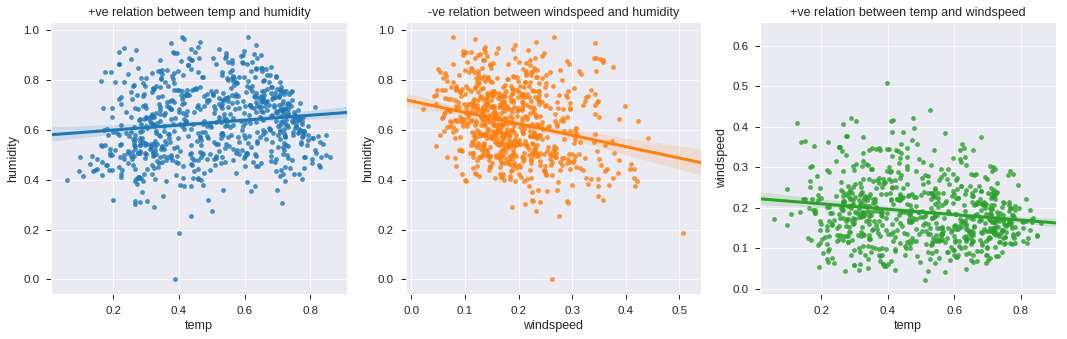

In [29]:
# Regresson plots between temp, windspeed and humidity to show thier relation with each other
_ , ax = plt.subplots(1,3, figsize=(18,5)) # 1 row 3 column subplots

sns.regplot(x = 'temp', y='humidity', data=bike_day, ax= ax[0])# Regression plot
ax[0].set_title('+ve relation between temp and humidity') # set title

sns.regplot(x = 'windspeed', y='humidity', data=bike_day, ax= ax[1])# Regression plot
ax[1].set_title('-ve relation between windspeed and humidity') # set title

sns.regplot(x = 'temp', y='windspeed', data=bike_day, ax= ax[2])# Regression plot
ax[2].set_title('+ve relation between temp and windspeed') # set title

#### Observation

* A +ve correlation between humidity and temperature was observed (as temp increases the amount of water vapour present in the air also increases)
* A -ve correlation between windspeed with humidity and temperature was observed (as wind increases, it draws heat from the body, thereby temperature and humidity decreases)

<b> C. Correlation | Heatmap </b>

In [30]:
# Calculate Co-variance of new data
bike_corr = bike_day.corr()

# Create mask for upper triangle of co-var matrix 

mask1 = np.array(bike_corr)
mask1[np.tril_indices_from(mask1)] = False # setting upper triangle show to False

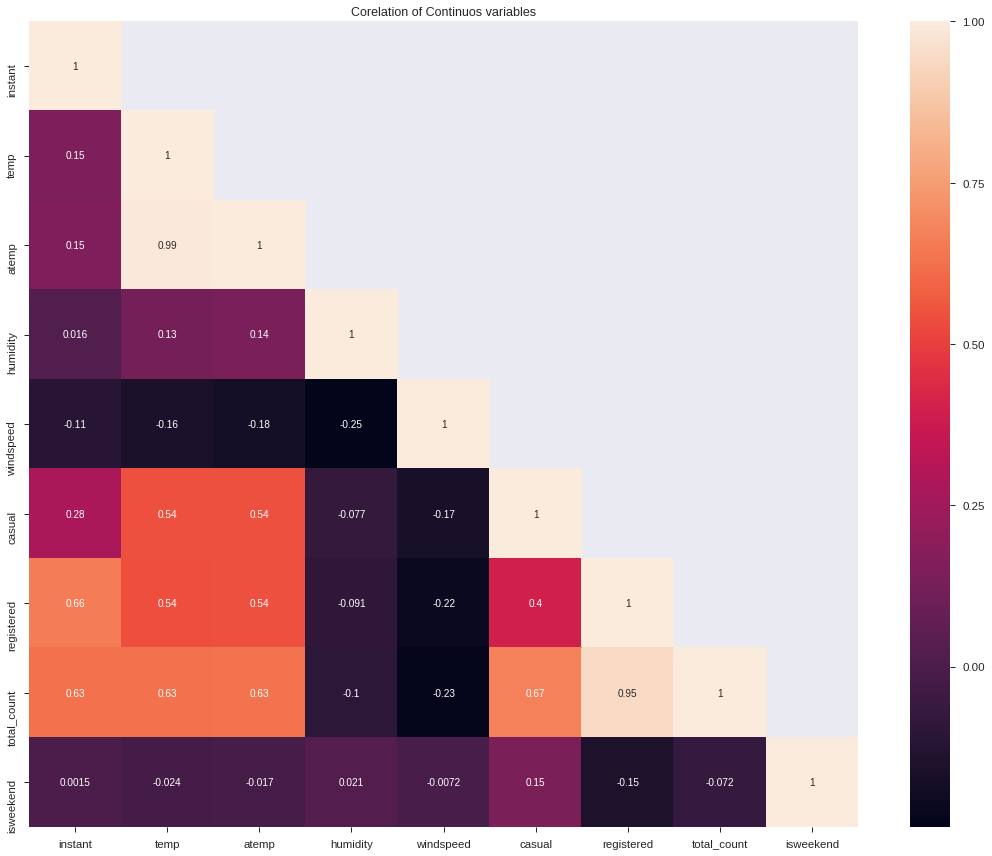

In [31]:
# heatmap of continous variables
_, ax = plt.subplots(1,1, figsize=(15,12)) # 2 row 1 column subplot
sns.heatmap(bike_corr, mask=mask1, annot=True, square=False, ax=ax) # heatmap
ax.set_title('Corelation of Continuos variables') # set title

plt.tight_layout()

### Observation: continuous features¶
* Temp, Atemp looks normally distributed.
* A strong corelation can be seen for temp and atemp.
* windspeed, humidity, temp and atemp are all normalised in the dataset already.
* With increase in temperature, the count of bike rentals increases as shown in reg plot.

### <a id='2.1.2.2'>2.1.2.2  Outlier Analysis: Box Plots, Pair Plots</a>

[Text(0, 0.5, 'humidity'), Text(0.5, 1.0, 'Box Plot On humidity')]

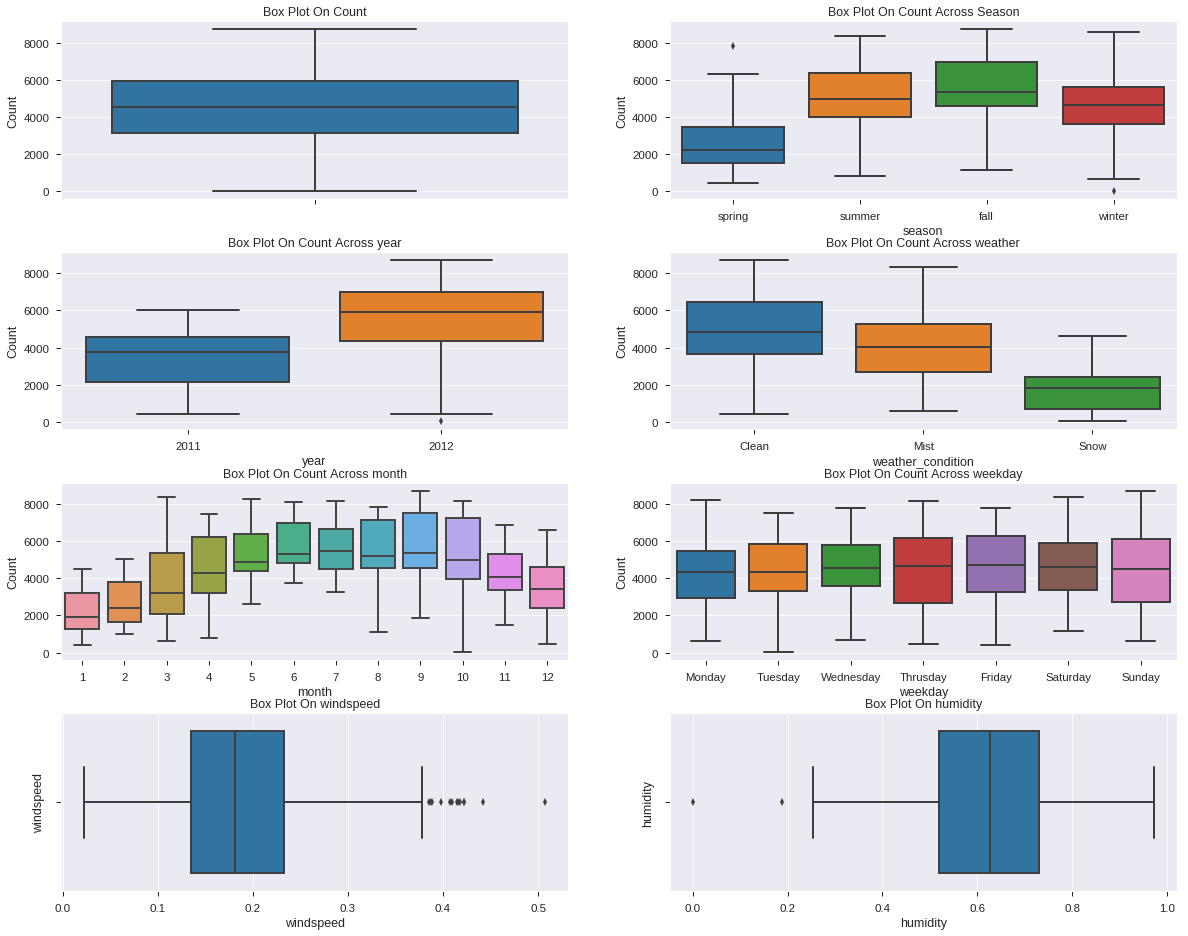

In [32]:
# Outlier Analysis
fig, axes = plt.subplots(nrows=4,ncols=2) # 4 row 2 column subplots
fig.set_size_inches(20, 16) # set figure size
plt.subplots_adjust(hspace=0.3) # set hspace to avoid overlapping

# boxplots for categorical and continuous features
sns.boxplot(data=bike_day,y="total_count", ax=axes[0][0])
sns.boxplot(data=bike_day,y="total_count",x="season", ax=axes[0][1])
sns.boxplot(data=bike_day,y="total_count",x="year", ax=axes[1][0])
sns.boxplot(data=bike_day,y="total_count",x="weather_condition", ax=axes[1][1])
sns.boxplot(data=bike_day,y="total_count",x="month", ax=axes[2][0])
sns.boxplot(data=bike_day,y="total_count",x="weekday", ax=axes[2][1])
sns.boxplot(data=bike_day,x="windspeed", ax=axes[3][0])
sns.boxplot(data=bike_day,x="humidity", ax=axes[3][1])


axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(ylabel='Count',title="Box Plot On Count Across Season")
axes[0][1].set_xticklabels(['spring','summer','fall','winter'])

axes[1][0].set(ylabel='Count',title="Box Plot On Count Across year")
axes[1][0].set_xticklabels(['2011','2012'])

axes[1][1].set(ylabel='Count',title="Box Plot On Count Across weather")
axes[1][1].set_xticklabels(['Clean','Mist','Snow'])

axes[2][0].set(ylabel='Count',title="Box Plot On Count Across month")
axes[2][1].set(ylabel='Count',title="Box Plot On Count Across weekday")
axes[2][1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Sunday'])

axes[3][0].set(ylabel='windspeed',title="Box Plot On windspeed")
axes[3][1].set(ylabel='humidity',title="Box Plot On humidity")


Text(0.5, 1.0, 'Pairplot for outlier analysis')

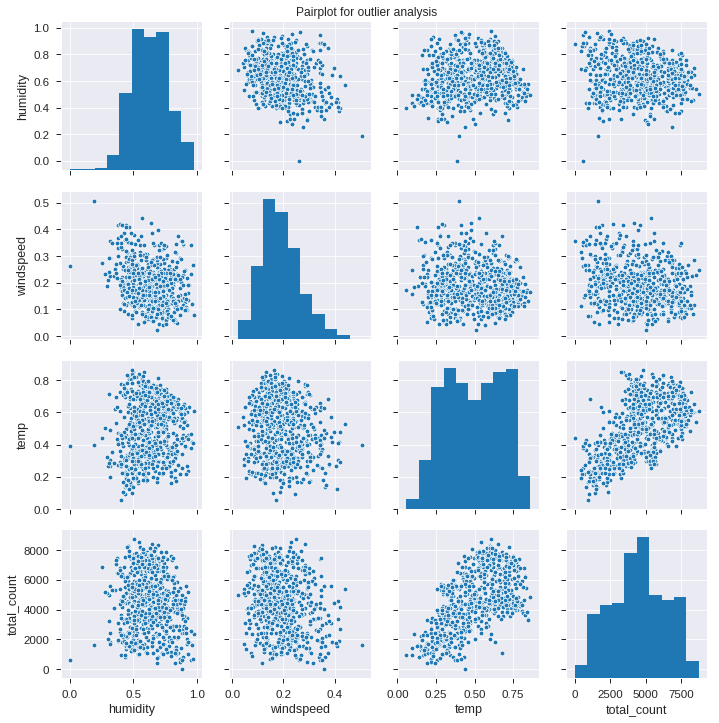

In [33]:
# Pairplot for outlier analysis
ax = sns.pairplot(data=bike_day[['humidity','windspeed','temp','total_count']],palette='hls')
ax.fig.suptitle('Pairplot for outlier analysis', y=1.0)

### Observation: 

- temp has got positive correlation with count as people like to travel more when the sky is clear.
- humidity is inversely related to count as expected as when weather is humid people will not like to travel on a bike.
- windspeed is also having a negative correlation with "count".
- "atemp" and "temp" variable has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.
- "weather_condition" and count are inversely related. This is because for our data as weather increases from (1 to 4) implies that weather is getting more worse and so lesser people will rent bikes.
- "registered" and count are highly related which indicates that most of the bikes that are rented are registered.
- "Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building to avoid bias. (casual + registered = count)
- "instant" variable can also be dropped during model building as it indicates index.


# <a id='2.2'>2.2 Data preprocessing</a>

### <a id='2.2.1'>2.2.1 Outlier handling</a>

In [34]:
bike_day.head()

instant   datetime season year month holiday weekday workingday  \
0        1 2011-01-01      1    0     1       0       6          0   
1        2 2011-01-02      1    0     1       0       0          0   
2        3 2011-01-03      1    0     1       0       1          1   
3        4 2011-01-04      1    0     1       0       2          1   
4        5 2011-01-05      1    0     1       0       3          1   

  weather_condition      temp     atemp  humidity  windspeed  casual  \
0                 2  0.344167  0.363625  0.805833   0.160446     331   
1                 2  0.363478  0.353739  0.696087   0.248539     131   
2                 1  0.196364  0.189405  0.437273   0.248309     120   
3                 1  0.200000  0.212122  0.590435   0.160296     108   
4                 1  0.226957  0.229270  0.436957   0.186900      82   

   registered  total_count  isweekend  
0         654          985          0  
1         670          801          1  
2        1229         1349          1  
3        1454         1562          0  
4        1518         1600          0

In [35]:
# finding outliers 
wind_humidity = pd.DataFrame(bike_day, columns=['windspeed', 'humidity'])

# get outliers for windspeed and humidity features
for i in ['windspeed', 'humidity']:
    q75, q25 = np.percentile(wind_humidity.loc[:,i], [75,25]) # get q75 and q25
    IQR = q75 - q25 # calculate  IQR for boxplot outlier method
    max = q75+(IQR*1.5) # get max bound 
    min = q25-(IQR*1.5) # get min bound
    wind_humidity.loc[wind_humidity.loc[:,i]<min,:i] = np.nan # replacing outliers with NAN
    wind_humidity.loc[wind_humidity.loc[:,i]>max,:i] = np.nan # replacing outliers with NAN

print('Shape after dropping outlier (windspeed,humidity):',wind_humidity.dropna().shape)
print('Shape before dropping outlier (windspeed,humidity):',bike_day[['windspeed','humidity']].shape)

Shape after dropping outlier (windspeed,humidity): (717, 2)
Shape before dropping outlier (windspeed,humidity): (731, 2)


In [36]:
# calculating outlier indexs
index=[]
outlier = pd.DataFrame()
for i in range(wind_humidity.shape[0]):
    if wind_humidity.loc[i,].isna().any(): # if either of windspeed or humidity is NAN, for each column
        outlier.loc[i,'outlier'] = 1 # store index as outlier 1
        index.append(i) # store indices of outliers
    else:
        outlier.loc[i,'outlier'] = 0
        
wind_humidity['outlier'] = outlier['outlier'].astype(int) # convert outlier column as integer 
wind_humidity.loc[index,] # show outliers with thier respective indices

windspeed  humidity  outlier
44         NaN  0.375833        1
49         NaN       NaN        1
68         NaN       NaN        1
93         NaN  0.426250        1
94         NaN  0.642083        1
292        NaN  0.636250        1
382        NaN  0.443333        1
407        NaN  0.464583        1
420        NaN  0.395833        1
432        NaN  0.567500        1
433        NaN  0.407083        1
450        NaN  0.477917        1
666        NaN  0.694583        1
721        NaN  0.441250        1

In [37]:
bike_day['outlier'] = wind_humidity['outlier'] # add oulier feature in bike data

#dropping all the outliers present in dataframe
bike_day.drop(bike_day[(bike_day.outlier==1) ].index, inplace=True) # dropping all the outliers
print('Shape after dropping outlier:',bike_day.shape) # shape of the after removing outlier rows
print(bike_day.info())

Shape after dropping outlier: (717, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 730
Data columns (total 18 columns):
instant              717 non-null int64
datetime             717 non-null datetime64[ns]
season               717 non-null category
year                 717 non-null category
month                717 non-null category
holiday              717 non-null category
weekday              717 non-null category
workingday           717 non-null category
weather_condition    717 non-null category
temp                 717 non-null float64
atemp                717 non-null float64
humidity             717 non-null float64
windspeed            717 non-null float64
casual               717 non-null int64
registered           717 non-null int64
total_count          717 non-null int64
isweekend            717 non-null int64
outlier              717 non-null int64
dtypes: category(7), datetime64[ns](1), float64(4), int64(6)
memory usage: 73.5 KB
None


Text(0.5, 1.0, 'Pairplot after removing outliers')

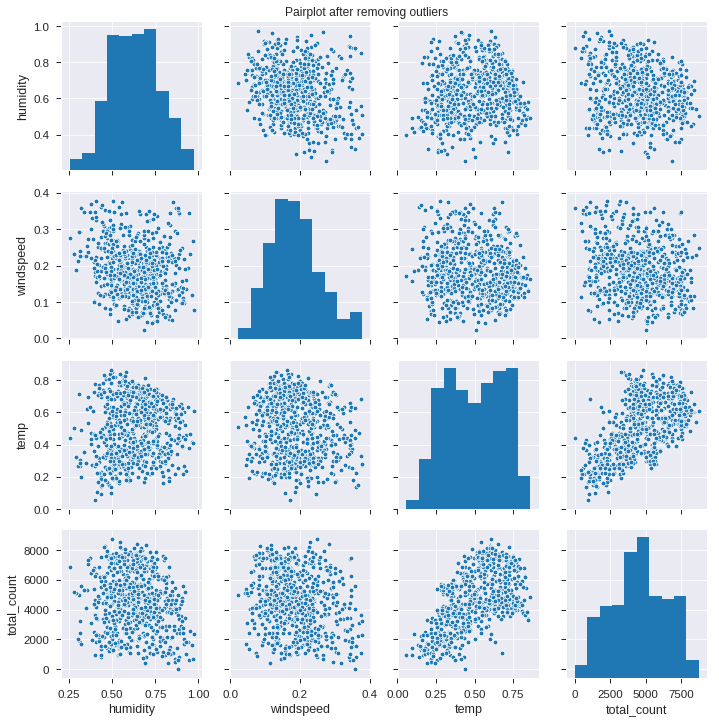

In [38]:
# Visualization after removing outliers
ax = sns.pairplot(data=bike_day[['humidity','windspeed','temp','total_count']],palette='hls') # pairplot of continuous features
ax.fig.suptitle('Pairplot after removing outliers', y=1.0)

### <a id='2.2.2'>2.2.2 Feature Selection</a>

In [39]:
# categorising features
categorical_features = ["season","holiday","weather_condition","weekday","month","year",'isweekend','workingday']
continous_features = ["temp","humidity","windspeed"]
dropFeatures = ['casual',"datetime","instant","registered","atemp","outlier"]
target=['total_count']

In [40]:
# drop unwanted features
bike_FE = bike_day.drop(dropFeatures, axis=1)
bike_FE.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_condition', 'temp', 'humidity', 'windspeed', 'total_count',
       'isweekend'],
      dtype='object')

### <a id='2.2.3'>2.2.3 Feature Engineering</a>
Converting categorical features to numercial features to feed our models using <b>"pd.get_dummies()"</b>. 

In [41]:
# create dummy data 
dummy_data = bike_FE.copy()

# fucntion for creating dummy features
def get_dummy(df, col):
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col, drop_first=True)], axis=1) # create dummy features and dropping first feature, since it's redundant
    df = df.drop([col], axis = 1)                                                      # drop feature of which dummy is created
    return df                                                                          # return dummy dataframe

# features to create dummy
# get_dummy_features = ["season","weather_condition","weekday","month"]
get_dummy_features = categorical_features

# create dummy for features
for col in get_dummy_features:
    dummy_data = get_dummy(dummy_data, col) # create dummy for all categorical features
    
dummy_data.head()

temp  humidity  windspeed  total_count  season_2  season_3  season_4  \
0  0.344167  0.805833   0.160446          985         0         0         0   
1  0.363478  0.696087   0.248539          801         0         0         0   
2  0.196364  0.437273   0.248309         1349         0         0         0   
3  0.200000  0.590435   0.160296         1562         0         0         0   
4  0.226957  0.436957   0.186900         1600         0         0         0   

   holiday_1  weather_condition_2  weather_condition_3  ...  month_6  month_7  \
0          0                    1                    0  ...        0        0   
1          0                    1                    0  ...        0        0   
2          0                    0                    0  ...        0        0   
3          0                    0                    0  ...        0        0   
4          0                    0                    0  ...        0        0   

   month_8  month_9  month_10  month_11  month_12  year_1  isweekend_1  \
0        0        0         0         0         0       0            0   
1        0        0         0         0         0       0            1   
2        0        0         0         0         0       0            1   
3        0        0         0         0         0       0            0   
4        0        0         0         0         0       0            0   

   workingday_1  
0             0  
1             0  
2             1  
3             1  
4             1  

[5 rows x 30 columns]

In [42]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 730
Data columns (total 30 columns):
temp                   717 non-null float64
humidity               717 non-null float64
windspeed              717 non-null float64
total_count            717 non-null int64
season_2               717 non-null uint8
season_3               717 non-null uint8
season_4               717 non-null uint8
holiday_1              717 non-null uint8
weather_condition_2    717 non-null uint8
weather_condition_3    717 non-null uint8
weekday_1              717 non-null uint8
weekday_2              717 non-null uint8
weekday_3              717 non-null uint8
weekday_4              717 non-null uint8
weekday_5              717 non-null uint8
weekday_6              717 non-null uint8
month_2                717 non-null uint8
month_3                717 non-null uint8
month_4                717 non-null uint8
month_5                717 non-null uint8
month_6                717 non-null uint8
month_7

# <a id='2.3'>2.3 Modeling</a>

### <a id='2.3.1'>2.3.1 Sampling</a>

<b> Splitting data</b> in train and test in 75% and 25% of total data respectively

In [43]:
# splitting data in test and train set
X_train, X_test, y_train, y_test = train_test_split(dummy_data.drop(['total_count'], axis=1),dummy_data.total_count,test_size=0.25,random_state=14)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(537, 29) (180, 29) (537,) (180,)


In [44]:
# function: get metrics
def metrics(regressor_name, regressor, y_pred):
    """Print metrics: r2, adj r2, rmse, rmsle
    parameters: 
        regressor_name: list, dataframe, matrix
        regressor: fitted model object
        y_pred: list, dataframe, matrix
    """
    print(regressor_name)                          # print regressor name
    print('R^2:',regressor.score(X_test, y_test))  # Returns the coefficient of determination R^2 of the prediction.
    print('Adj R^2: ', 1 - (1-regressor.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)) # Returns the coefficient of determination Adj R^2 of the prediction.
    print('RMSE {}: {}'.format(regressor_name,  np.sqrt(mean_squared_error(y_test, y_pred)))) # Retrun rmse score
    print('RMSLE {}: {}'.format(regressor_name,  np.sqrt(mean_squared_log_error(y_test, y_pred)))) # Retrun rmsle score

# function: plot scores
def plot_score(grid_cv, name):
    score = pd.DataFrame(grid_cv.cv_results_) # create dataframe of the cv results
    score['alpha'] = score['param_model__alpha'] # rename parameter columns
    score['r2'] = score['mean_test_score']
    sns.pointplot(data=score, x='alpha', y='r2', color=random.choice(['r','b','g','y']))
    plt.title(name)
    plt.grid(True)
    plt.show()
    
# function: plot residuals graph
def plotResiduals(y_test, y_pred, name):
    residuals = y_test - y_pred                    # get residuals
    _, ax = plt.subplots()                         # create subplot
    ax.scatter(y_test, residuals)                  # scatter plot for actuals and residuals
    ax.axhline()                                   # create reg line
    ax.set_xlabel('Observed')
    ax.set_ylabel('Residuals')
    ax.title.set_text(name[:15]+ ' Residual Plot | RSME: ' + str(np.sqrt(mean_squared_error(y_test, y_pred))))
    plt.show()

# function: plot distribution graph
def distPlot(y_pred, y_test, name):
    plt.figure(figsize=(10,5))
    sns.distplot(y_pred)
    sns.distplot(y_test)
    plt.legend(['y_pred','y_test'])
    plt.title(name+'|comparison of prediction distribution')  
    plt.show()

# function: simple regressor
def simpleRegressor(model):
    """Simple Regressor function for each model given in model variable by creating pipeline with StandardScale() and fit data to predict.
        model: dict()
        
    """
    for regressor_name, regressor in linear_models.items():
        pipeline = Pipeline( [('scaler', StandardScaler()), ('model',regressor)] ) # create pipeline of each model with StandardScale
        regressor = pipeline.fit(X_train, y_train)                                 # fit data to the pipeline 
        y_pred = regressor.predict(X_test)                                         # Predict using the pipeline model
     
        metrics(regressor_name, regressor, y_pred)                                 # get metrics : r2, adj r2, rmse, rmsle
        print("\n")
    
# function: simple ensemble regressor
def ensembleRegressor(model):
    """Ensemble Regressor function for each model given in model variable by creating pipeline with StandardScale() and fit data to predict.
        model: dict()
        
    """
    if type(model) == dict:
        for regressor_name_, regressor_ in model.items():
            pipeline = Pipeline( [('scaler', StandardScaler()),  ('model',regressor_)] ) # create pipeline of each model with StandardScale
            regressor_ = pipeline.fit(X_train, y_train)                                  # fit data to the pipeline 
            y_pred = regressor_.predict(X_test)                                          # Predict using the pipeline model
            metrics(regressor_name_,regressor_, y_pred )                                 # get metrics : r2, adj r2, rmse, rmsle
            plotResiduals(y_test, y_pred, regressor_name_)                               # plot residual graphs

            
# function: Compare Algorithms
def comparePlot(results, names):
    fig = plt.figure()
    fig.suptitle( 'Algorithm Comparison' )
    ax = fig.add_subplot(111)
    plt.scatter(names, results)
    ax.set_xticklabels(names)
    plt.show()

# function: ensemble regressor with hyper-parameter tunning
def gridSearchRegressor(model, param_grid, scoring = 'r2', plot_score_ = False, compare_score = False):
    """GridSearchRegressor function for each model given in model variable by creating pipeline with StandardScale() and fit data to predict.
        model: dict()
        scoring: r2 default
        plot_score_ = optional False default, for plotting socre
        compare_score = optional False default, for comparing the model scores
    """
    best_score = []
    name = []

    for regressor_name, regressor in model.items():
        pipeline = Pipeline( [('scaler', StandardScaler()),  ('model',regressor)] ) # create pipeline of each model with StandardScale
        grid_cv = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring = scoring, cv = 5) # estimate best parameter using gridSearchCV()
        grid_cv.fit(X_train, y_train) #  # fit data to the pipeline 
        
        name.append(regressor_name)
        best_score.append(grid_cv.best_score_) # append best score from gridSearch
        
        print(regressor_name)
        print('Best score:',grid_cv.best_score_) # print best score from gridSearch
        print('Best param:',grid_cv.best_params_) # print best parameter from gridSearch
        
        best_grid = grid_cv.best_estimator_ # get best score from gridSearch best estimator
        y_pred=best_grid.predict(X_test) # predict using best estimator
          
        metrics(regressor_name,best_grid, y_pred )  # get metrics : r2, adj r2, rmse, rmsle
        plotResiduals(y_test, y_pred, regressor_name)        
        distPlot(y_pred, y_test, name=regressor_name) 
        if plot_score_:
            plot_score(grid_cv, regressor_name) # plot score
    if compare_score:    
        comparePlot(best_score, name)    # plot comparison
    

### <a id='2.3.2'>2.3.2 MultiLinear & Regularization model: LinearRegression| Ridge| Lasso| ElasticNet</a>

In [45]:
# liner models
linear_models = {'LinearRegression':LinearRegression(), 'Ridge':Ridge(), 'Lasso':Lasso(), 'ElasticNet':ElasticNet()}

# Score without StandardScale
print('Score without StandardScale:\n')
for regressor_name, regressor in linear_models.items():
    regressor.fit(X_train, y_train) # fit data to models
    y_pred = regressor.predict(X_test) # predict using models

    metrics(regressor_name, regressor, y_pred)
    print("\n")

# Score without StandardScale:

# LinearRegression
# R^2: 0.8503150391570842
# Adj R^2:  0.8213759467274537
# RMSE LinearRegression: 720.8842925663198
# RMSLE LinearRegression: 0.2465516805375247


# Ridge
# R^2: 0.8478419303061329
# Adj R^2:  0.8184247034986518
# RMSE Ridge: 726.8151540447384
# RMSLE Ridge: 0.2381610980768202


# Lasso
# R^2: 0.8504890420887281
# Adj R^2:  0.8215835902258822
# RMSE Lasso: 720.4651707841829
# RMSLE Lasso: 0.23878836957603555


# ElasticNet
# R^2: 0.379145172923085
# Adj R^2:  0.25911323968821476
# RMSE ElasticNet: 1468.1536519170734
# RMSLE ElasticNet: 0.46300107772627347

    
    
# Score with StandardScale
print('Score with StandardScale:\n')
simpleRegressor(linear_models)



# Score with StandardScale:

# LinearRegression
# R^2: 0.8503150391570844
# Adj R^2:  0.8213759467274541
# RMSE LinearRegression: 720.8842925663195
# RMSLE LinearRegression: 0.24655168053752335


# Ridge
# R^2: 0.8502971862653109
# Adj R^2:  0.8213546422766044
# RMSE Ridge: 720.9272811386522
# RMSLE Ridge: 0.24640128765416605


# Lasso
# R^2: 0.85043352042173
# Adj R^2:  0.8215173343699311
# RMSE Lasso: 720.5989325995707
# RMSLE Lasso: 0.24569841589499636


# ElasticNet
# R^2: 0.7690031028056619
# Adj R^2:  0.7243437026814232
# RMSE ElasticNet: 895.528789006083
# RMSLE ElasticNet: 0.2952233398791348

Score without StandardScale:

LinearRegression
R^2: 0.8503150391570846
Adj R^2:  0.8213759467274543
RMSE LinearRegression: 720.884292566319
RMSLE LinearRegression: 0.24655168053752227


Ridge
R^2: 0.8478859677197568
Adj R^2:  0.8184772548122431
RMSE Ridge: 726.7099694303831
RMSLE Ridge: 0.23718551622027978


Lasso
R^2: 0.8505183332730695
Adj R^2:  0.8216185443725296
RMSE Lasso: 720.3945929746086
RMSLE Lasso: 0.23937157014465343


ElasticNet
R^2: 0.38174714936703946
Adj R^2:  0.2622182649113337
RMSE ElasticNet: 1465.073936715073
RMSLE ElasticNet: 0.4622159135456029


Score with StandardScale:

LinearRegression
R^2: 0.8503150391570846
Adj R^2:  0.8213759467274543
RMSE LinearRegression: 720.8842925663187
RMSLE LinearRegression: 0.24655168053752474


Ridge
R^2: 0.8502916818898008
Adj R^2:  0.8213480737218289
RMSE Ridge: 720.9405347906569
RMSLE Ridge: 0.24641789894025196


Lasso
R^2: 0.8504503079981879
Adj R^2:  0.8215373675445042
RMSE Lasso: 720.5584908870317
RMSLE Lasso: 0.246116642373479

### Regularizarion models with hyper_tunning parameter:  Ridge| Lasso| ElasticNet

Score with GridSearchCV:

Ridge
Best score: 0.8223767765789581
Best param: {'model__alpha': 5, 'model__max_iter': 3000}
Ridge
R^2: 0.8500923254963552
Adj R^2:  0.8211101750923171
RMSE Ridge: 721.4203888550242
RMSLE Ridge: 0.2457870629544674


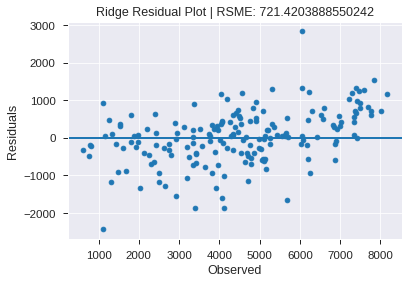

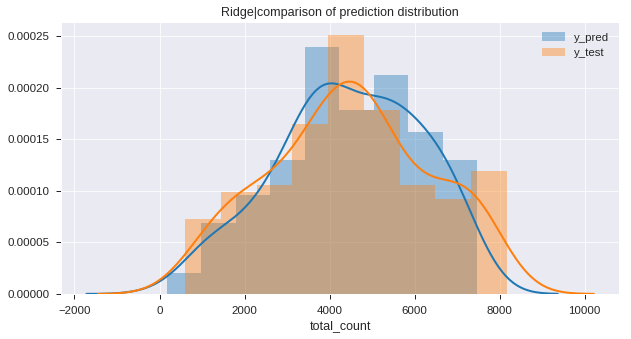

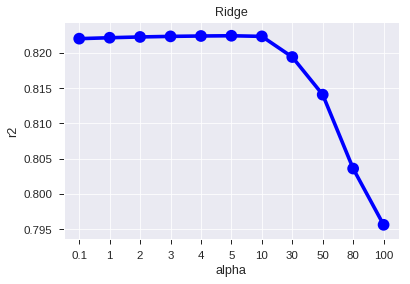

Lasso
Best score: 0.8222045333291521
Best param: {'model__alpha': 4, 'model__max_iter': 3000}
Lasso
R^2: 0.8506965260145409
Adj R^2:  0.8218311877106855
RMSE Lasso: 719.9650842282963
RMSLE Lasso: 0.24418651941649966


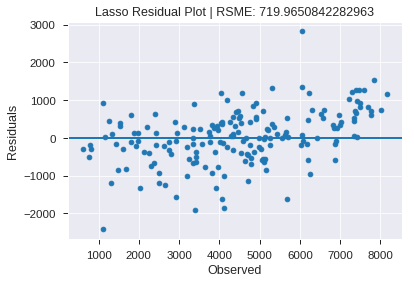

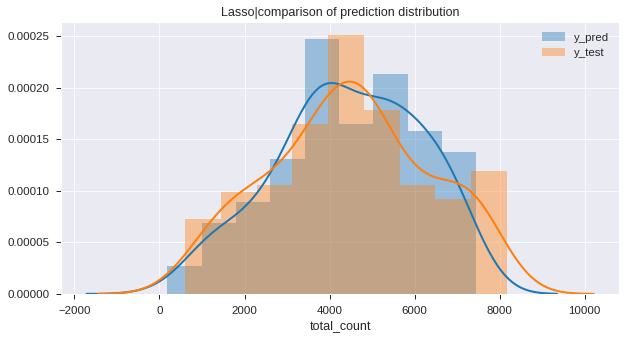

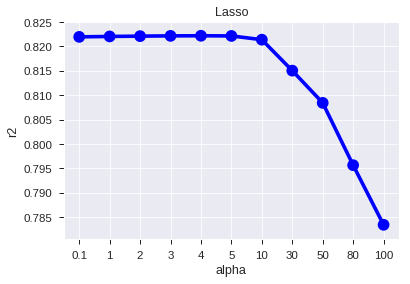

ElasticNet
Best score: 0.8209957222253051
Best param: {'model__alpha': 0.1, 'model__max_iter': 3000}
ElasticNet
R^2: 0.8473437218703781
Adj R^2:  0.8178301747653178
RMSE ElasticNet: 728.0040805247589
RMSLE ElasticNet: 0.24210180658879643


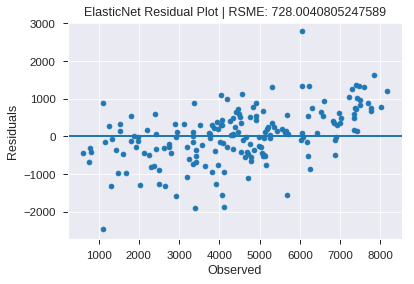

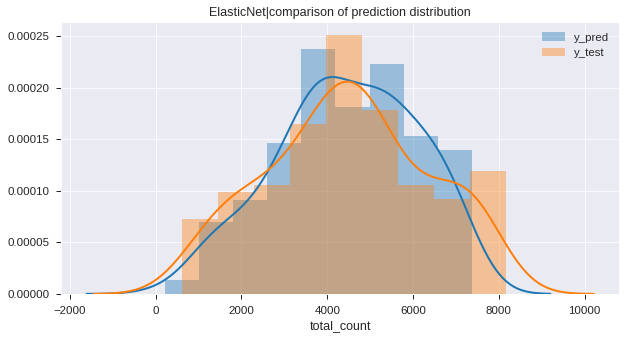

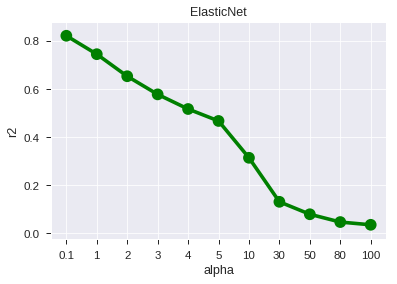

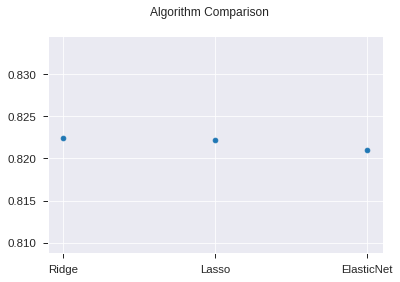

In [46]:

# linear regularization model with hypertuning parameters
regularization_linear_models = { 'Ridge':Ridge(), 'Lasso':Lasso(), 'ElasticNet':ElasticNet()}

# Regularization hyper-parameter tunning with GridSearchCV
print('Score with GridSearchCV:\n')
param_grid1 = {'model__alpha' : [0.1, 1, 2, 3, 4, 5, 10, 30, 50, 80, 100],'model__max_iter':[3000] } # parameters for feeding in gridSearch
gridSearchRegressor(regularization_linear_models, param_grid=param_grid1, plot_score_=True, compare_score=True )

    
# Score with GridSearchCV:

# Ridge
# Best score: 0.8223825219791182
# Best param: {'model__alpha': 5, 'model__max_iter': 3000}
# Ridge
# R^2: 0.8501161318996594
# Adj R^2:  0.8211385840669269
# RMSE Ridge: 721.3631032400775
# RMSLE Ridge: 0.24571028154769625

# Lasso
# Best score: 0.8220643248274393
# Best param: {'model__alpha': 3, 'model__max_iter': 3000}
# Lasso
# R^2: 0.8505544480598202
# Adj R^2:  0.8215178229750227
# RMSE Lasso: 720.3075640121864
# RMSLE Lasso: 0.24420533245983528
# Best param: {'model__alpha': 3, 'model__max_iter': 3000}

# ElasticNet
# Best score: 0.8209891999677044
# Best param: {'model__alpha': 0.1, 'model__max_iter': 3000}
# ElasticNet
# R^2: 0.8473885489959245
# Adj R^2:  0.7243433797638379
# RMSE ElasticNet: 727.8971844088097
# RMSLE ElasticNet: 0.24186048423041664
# Best param: {'model__alpha': 0.1, 'model__max_iter': 3000}


### <a id='2.3.3'>2.3.3 Ensemble model:  RandomForestRegressor</a>

RandomForestRegressor
R^2: 0.8649320139183166
Adj R^2:  0.8388188699425245
RMSE RandomForestRegressor: 684.7825594871541
RMSLE RandomForestRegressor: 0.2333816742631807


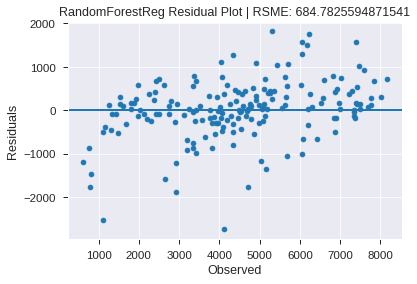

In [47]:
# Simple RandomForestRegressor
ensemble_model1 = {'RandomForestRegressor':RandomForestRegressor(random_state=867)}
ensembleRegressor(ensemble_model1)

# RandomForestRegressor
# R^2: 0.8649320139183166
# Adj R^2:  0.8388188699425245
# RMSE RandomForestRegressor: 684.7825594871541
# RMSLE RandomForestRegressor: 0.2333816742631807

RandomForestRegressor
Best score: 0.8587517092660517
Best param: {'model__max_depth': 10, 'model__max_features': 'auto', 'model__n_estimators': 900, 'model__random_state': 897}
RandomForestRegressor
R^2: 0.8715849042781012
Adj R^2:  0.8467579857718674
RMSE RandomForestRegressor: 667.7048312259761
RMSLE RandomForestRegressor: 0.2349906934957484


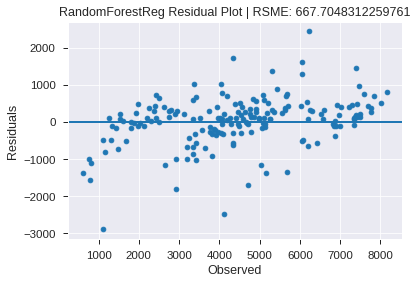

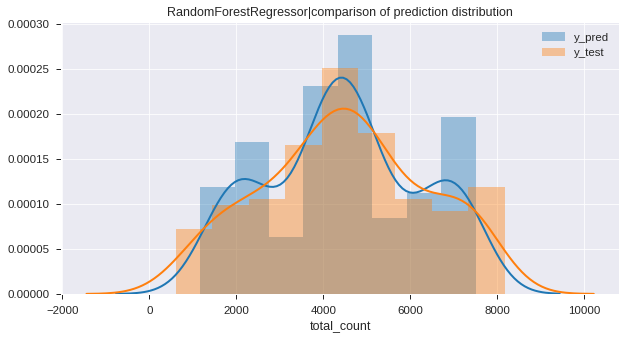

In [48]:
# Hyper-parameter tunning: RandomForestRegressor

param_grid = {
    'model__n_estimators' : [10,900],
    'model__max_depth': [5,6,7,10],
    'model__max_features' : ['log2','sqrt','auto'],
    'model__random_state': [897]
}

ensemble_model = {'RandomForestRegressor':RandomForestRegressor(random_state=867) }
gridSearchRegressor(ensemble_model,param_grid=param_grid )

# RandomForestRegressor
# Best score: 0.8587517092660517
# Best param: {'model__max_depth': 10, 'model__max_features': 'auto', 'model__n_estimators': 900, 'model__random_state': 897}
# RandomForestRegressor
# R^2: 0.8715849042781012
# Adj R^2:  0.8467579857718674
# RMSE RandomForestRegressor: 667.7048312259761
# RMSLE RandomForestRegressor: 0.2349906934957484

### <a id='2.3.4'>2.3.4 Boosting model: GradientBoostingRegressor</a>

GradientBoostingRegressor
R^2: 0.8862719523839226
Adj R^2:  0.8642845298448143
RMSE GradientBoostingRegressor: 628.3625167761045
RMSLE GradientBoostingRegressor: 0.19722626748641778


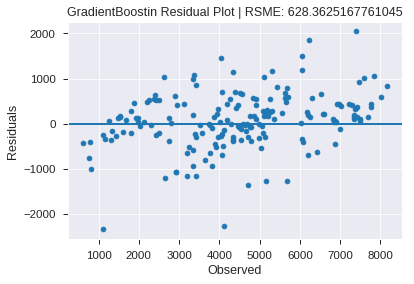

In [49]:
# Simple GradientBoostingRegressor
ensemble_model2 = {'GradientBoostingRegressor':GradientBoostingRegressor(random_state=867)}
ensembleRegressor(ensemble_model2)

# GradientBoostingRegressor
# R^2: 0.8862719523839226
# Adj R^2:  0.8642845298448143
# RMSE GradientBoostingRegressor: 628.3625167761045
# RMSLE GradientBoostingRegressor: 0.19722626748641778

GradientBoostingRegressor
Best score: 0.8869327747143647
Best param: {'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__n_estimators': 250, 'model__random_state': 17, 'model__subsample': 0.7}
GradientBoostingRegressor
R^2: 0.8870138124626565
Adj R^2:  0.8651698162054368
RMSE GradientBoostingRegressor: 626.3097260903672
RMSLE GradientBoostingRegressor: 0.2143924133958078


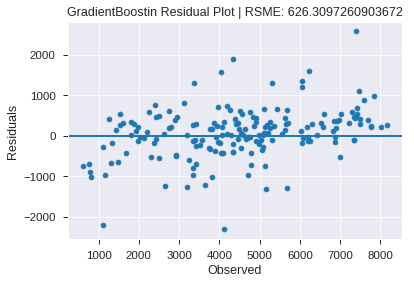

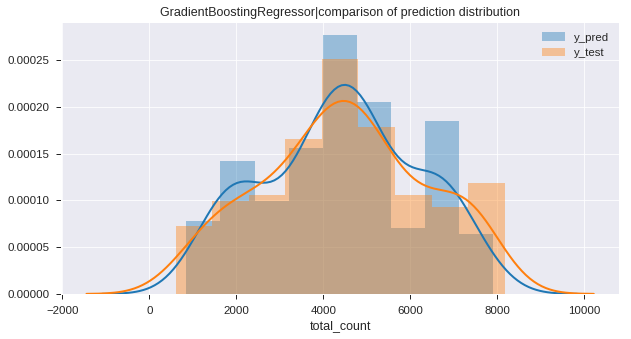

In [50]:
# Hyper-parameter tunning: GradientBoostingRegressor

hyper_param = {
                   'model__n_estimators' : [250,400,500,650,800], # The number of boosting stages to perform.
                   'model__max_depth' : [5,6,7,8], # maximum depth of the individual regression estimators
                   'model__max_features' : ['log2','sqrt','auto'], # The number of features to consider when looking for the best split:
                   'model__subsample' : [0.7,0.85,0.9], # The fraction of samples to be used for fitting the individual base learners.  If smaller than 1.0 this results in Stochastic Gradient Boosting.
                   'model__random_state': [17]

                  }

gbm_ensemble_model = {'GradientBoostingRegressor':GradientBoostingRegressor() }
gridSearchRegressor(gbm_ensemble_model,hyper_param )

# GradientBoostingRegressor
# Best score: 0.8869327747143647
# Best param: {'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__n_estimators': 250, 'model__random_state': 17, 'model__subsample': 0.7}
# GradientBoostingRegressor
# R^2: 0.8870138124626565
# Adj R^2:  0.8651698162054368
# RMSE GradientBoostingRegressor: 626.3097260903672
# RMSLE GradientBoostingRegressor: 0.2143924133958078

# <a id='3'>3. Final Model</a>

## Model: GradientBoostingRegressor

GradientBoostingRegressor
GradientBoostingRegressor
R^2: 0.8819155688462875
Adj R^2:  0.8590859121565698
RMSE GradientBoostingRegressor: 640.28422142774
RMSLE GradientBoostingRegressor: 0.21093760709288065


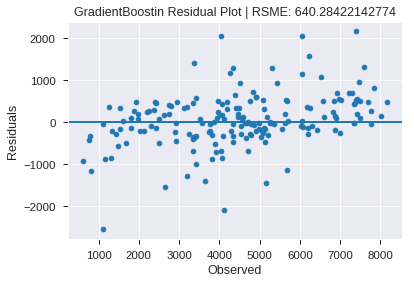

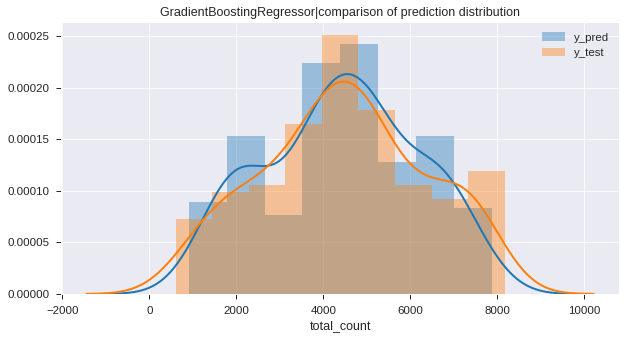

In [51]:
# Final model: Tuned GradientBoostingRegressor

# parameters
params = {'max_depth': 5, 
          'max_features': 'sqrt', 
          'n_estimators': 250, 
          'random_state': 147, 
          'subsample': 0.85
         }
# regressor
regressor_name = 'GradientBoostingRegressor'

# pipeline
pipeline = Pipeline( [('scaler', StandardScaler()),  ('model',GradientBoostingRegressor(**params))] ) # create pipeline
pipeline.fit(X_train, y_train)  # fit data to the pipeline
gbm_y_pred = pipeline.predict(X_test) # make prediction using pipeline

# metrics and plots
print(regressor_name)
metrics(regressor_name, pipeline, gbm_y_pred ) # 
plotResiduals(y_test, gbm_y_pred, regressor_name)        
distPlot(gbm_y_pred, y_test, name=regressor_name)



# GradientBoostingRegressor
# R^2: 0.8819155688462875
# Adj R^2:  0.8590859121565698
# RMSE GradientBoostingRegressor: 640.28422142774
# RMSLE GradientBoostingRegressor: 0.21093760709288065

 ##  Submission

In [52]:
# Final submission
bikeTestPred = pd.DataFrame()
bikeTestPred['y_test'] = y_test
bikeTestPred['gbm_y_pred'] = gbm_y_pred
bikeTestPred['gbm_y_pred'] = bikeTestPred['gbm_y_pred'].astype(int)

bikeTestPred.to_csv('Bike_Renting_Python.csv')
bikeTestPred

y_test  gbm_y_pred
247    3351        3743
675    5686        5194
417    4773        4272
659    6824        6585
217    4294        4509
..      ...         ...
604    6917        6225
544    6879        7072
185    4665        5042
435    4911        4325
254    4713        4705

[180 rows x 2 columns]

Download CSV for Test result:
<a  href="Bike_Renting_Python.csv" target="_blank">download Bike_Renting_Python</a>
